

## Chi-Square

Chi-Square tests are non-parametric statistical methods applied exclusively to **categorical variables**. These tests compare observed frequencies to expected frequencies under a null hypothesis.

### Key Chi-Square Applications

| Test Name | Primary Purpose | Source Link Reference |
| :--- | :--- | :--- |
| **Test of Independence** | Tests whether two categorical variables are **related** to each other. | *Verified by Wikipedia & SciPy references* |
| **Goodness-of-Fit Test** | Tests whether the observed frequency distribution of a single categorical variable matches a specific **expected distribution**. | *Verified by SciPy & Scribbr references* |

The Chi-Square distribution is also used for **confidence interval estimation for a population standard deviation** (or variance) of a normal distribution from a sample standard deviation, as detailed in the **SciPy documentation**


***

## The Chi-Squared ($\chi^2$) Distribution

The **Chi-Squared Distribution** is the theoretical probability model used to determine statistical significance in the Chi-Square tests. Its characteristics are determined solely by its **degrees of freedom ($\text{df}$)**, which is discussed further in the **Statisticshowto** link provided.

### Core Properties (Referencing Wikipedia & Scribbr)

* **Mean and $\text{df}$:** The mean of any $\chi^2$ distribution is **equal to its degrees of freedom ($\text{Mean} = \text{df}$)**.
* **Shape:** The distribution is always non-negative and is typically **right-skewed**.
* **Approaching Normality:** As the degrees of freedom increase, the $\chi^2$ distribution becomes less skewed and begins to approximate the shape of the **Normal Distribution**.
* **Purpose:** The $\chi^2$ distribution is primarily used for **hypothesis testing**, not for describing real-world observations (unlike Normal or Poisson distributions). This distinction is highlighted in the **Scribbr article** provided.

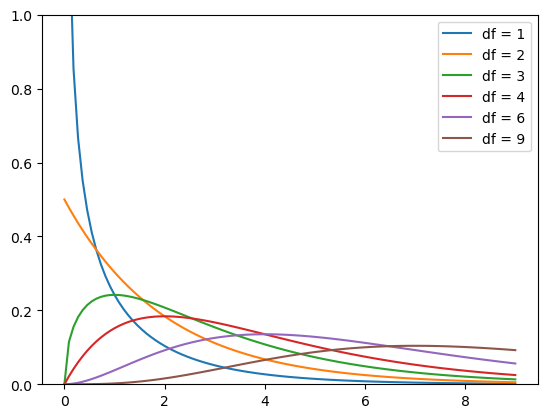

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

x = np.linspace(0, 9, 100)
plt.plot(x, chi2(1).pdf(x), label=f'df = 1')
plt.plot(x, chi2(2).pdf(x), label=f'df = 2')
plt.plot(x, chi2(3).pdf(x), label=f'df = 3')
plt.plot(x, chi2(4).pdf(x), label=f'df = 4')
plt.plot(x, chi2(6).pdf(x), label=f'df = 6')
plt.plot(x, chi2(9).pdf(x), label=f'df = 9')
plt.ylim(0, 1)

plt.legend();

## Chi-Square Application ($\chi^2$)

- How much does the observed results vary from the expected results
- Probability of an observed event given what is expected
- If we roll a die 24 times and 6 comes up 10 times, is this chance or the die is loaded?
- Chi-square squares the distances between the observed value and the expected value divided by the expected value
- $\chi^2 = \sum\frac{(O - E)^2}{E}$

Example:
- We flip a coin 18 times and heads comes up 12 times
- Expected value: 18 / 2 = 9
- $\chi^2 = \sum\frac{(O - E)^2}{E} = \frac{(12 - 9)^2}{9} + \frac{(6 - 9)^2}{9}$ = 2
- $\chi^2$ on the x axis and p-value on the y axis
- Low $\chi^2$ means a high correlation between observed and expected values
- $H_0$: 12 heads out of 18 flips is fair with 95% probability


Statistic value: 2.0, p-value: 0.15729920705028105
Critical value: 3.841458820694124


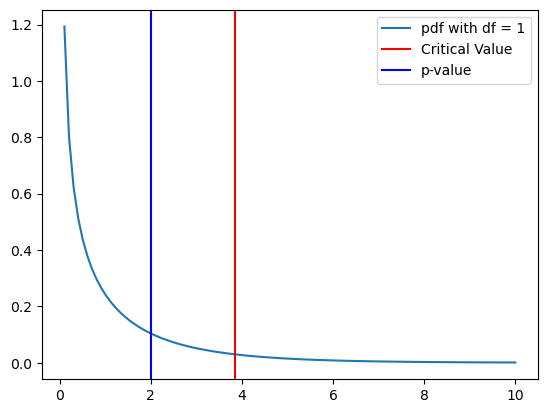

In [ ]:
# visualize with plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chisquare

sv, pv = chisquare([12, 6], [18 * 0.5, 18 * 0.5]) # statistic value, p value
print(f'Statistic value: {sv}, p-value: {pv}')
cv = chi2.ppf(1-.05, df=1) # critical value
print(f'Critical value: {cv}')
x = np.linspace(0, 10, 100)
y = chi2(1).pdf(x)
plt.plot(x, y, label=f'pdf with df = 1')
plt.axvline(x=np.round(cv, 3), color='r', label=f'Critical Value')
plt.axvline(x=np.round(sv, 3), color='b', label='p-value')

plt.legend();

## Feature Selection with $\chi^2$

Index(['sex', 'age', 'parch', 'fare', 'adult_male', 'pclass_3', 'who_man',
       'who_woman'],
      dtype='object')


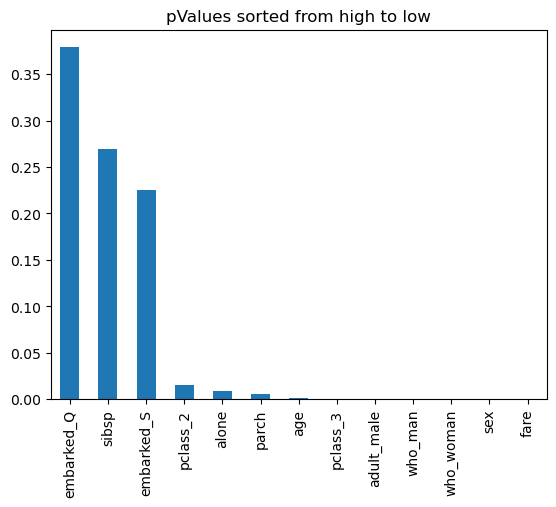

In [ ]:
# get libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/titanic_chaid.csv')

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Unnamed: 0', 'survived'], axis=1),
    df['survived'],
    test_size=0.25,
    random_state=42)

model = chi2(X_train, y_train)
model = pd.Series(model[1])
model.index = X_train.columns
plt.title('pValues sorted from high to low')
model.sort_values(ascending=False).plot.bar();

keepers = SelectPercentile(chi2, percentile=60).fit(X_train, y_train)
print(X_train.columns[keepers.get_support()])